# Determining One Piece Character Popularity on Twitter

I am going to test which characters from the manga One Piece is most popular. I will do this by looking at which characters are mentioned the most on Twitter
To do this I collected a day worth of tweets from Twitter that mention the words "one piece". 

In [127]:
import json
import pandas as pd 
import matplotlib.pyplot as plt


In [128]:
#Twitter data that I collected from 1/9/19 to 1/10/19 that mention the words "one piece"
tweets_data_path = '/Users/Alice/Programs/Python/Twitter/one_piece.txt'

In [129]:
#Open the collected data
tweets_data = []
tweets_file = open(tweets_data_path,'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [130]:
#Print how many tweets were collected
print len(tweets_data)

14827


First we will see which languages are most prevalent

In [131]:
#Create a pandas data frame
tweets = pd.DataFrame()

#Create a text column to hold the tweets,
#a lang column to hold the language of the tweets,
#and a country column to hold the region
tweets['text'] = map(lambda tweet: tweet.get('text'), tweets_data)
tweets['lang'] = map(lambda tweet: tweet.get('lang'), tweets_data)
tweets['country'] = map(lambda tweet: tweet.get('place').get(
       'country') if tweet.get('place') != None else None, tweets_data)

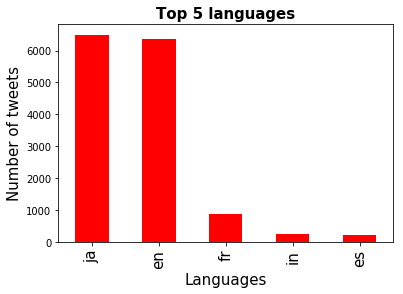

In [132]:
#Plot the top 5 languages that mention one piece
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

plt.show()

The two most prevalent languages are Japanese and English, with Japanese being slightly more prevalent. This was expected since One Piece is the most popular in Japanese and English-speaking countries

In [133]:
import re

def word_in_text(word, text):
    """
    Returns True if the word in the text
    Returns False otherwise
    """
    if text != None:
        word = word.lower()
        text = text.lower()
        match = re.search(word, text)
        if match:
            return True
    return False


Now I will make mulitple new columns to record which one piece characters are mentioned in each tweet. This should also eliminate some non-relevant tweets that mention the word "one piece", but does not have to do with the manga. After all, "one piece" is a relatively common set of words.

I picked all the characters currently in the Strawhat crew, plus Ace, since I know Ace is a very popular character. I plan to add more characters in the future. I want to compare the popularities of each character in English-speaking countries and in Japan, so I am going to make two columns for each character: one in English and one in Japanese.

In [154]:
#Add two columns with boolean values per character, one in English and one in Japanese
tweets['luffy'] = tweets['text'].apply(lambda tweet: word_in_text('luffy', tweet))
tweets['luffyJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'ルフィ', tweet))
tweets['zoro'] = tweets['text'].apply(lambda tweet: word_in_text('zoro', tweet))
tweets['zoroJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'ゾロ', tweet))
tweets['nami'] = tweets['text'].apply(lambda tweet: word_in_text('nami', tweet))
tweets['namiJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'ナミ', tweet))
tweets['usopp'] = tweets['text'].apply(lambda tweet: word_in_text('usopp', tweet))
tweets['usoppJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'ウソップ', tweet))
tweets['sanji'] = tweets['text'].apply(lambda tweet: word_in_text('sanji', tweet))
tweets['sanjiJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'サンジ', tweet))
tweets['chopper'] = tweets['text'].apply(lambda tweet: word_in_text('chopper', tweet))
tweets['chopperJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'チョッパー', tweet))
tweets['robin'] = tweets['text'].apply(lambda tweet: word_in_text('robin', tweet))
tweets['robinJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'ロビン', tweet))
tweets['franky'] = tweets['text'].apply(lambda tweet: word_in_text('franky', tweet))
tweets['frankyJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'フランキー', tweet))
tweets['brook'] = tweets['text'].apply(lambda tweet: word_in_text('brook', tweet))
tweets['brookJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'ブルック', tweet))
tweets['ace'] = tweets['text'].apply(lambda tweet: word_in_text('ace', tweet))
tweets['aceJP'] = tweets['text'].apply(lambda tweet: word_in_text(u'エース', tweet))


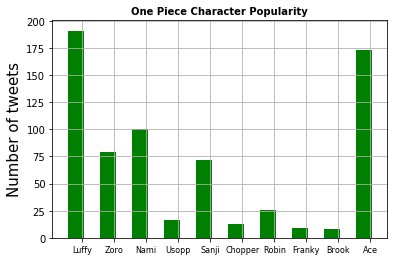

Luffy: 191
Ace: 173
Nami: 100
Zoro: 79
Sanji: 72
Robin: 26
Usopp: 16
Chopper: 13
Franky: 9
Brook: 8


In [180]:
#Plot the number of tweets for each character
characters = ['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji', 'Chopper', 'Robin', 'Franky', 'Brook', 'Ace']
tweets_by_chara = [tweets['luffy'].value_counts()[True],
                   tweets['zoro'].value_counts()[True],
                   tweets['nami'].value_counts()[True],
                   tweets['usopp'].value_counts()[True],
                   tweets['sanji'].value_counts()[True],
                   tweets['chopper'].value_counts()[True],
                   tweets['robin'].value_counts()[True],
                   tweets['franky'].value_counts()[True],
                   tweets['brook'].value_counts()[True],
                   tweets['ace'].value_counts()[True]]

x_pos = list(range(len(characters)))
width = 0.5
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_chara, width, alpha=1, color='g')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('One Piece Character Popularity',
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(characters, fontsize=8)
plt.grid()

plt.show()

#List the tweeted characters in descending order
character_popularity = dict(zip(characters, tweets_by_chara))
for key, value in sorted(character_popularity.iteritems(), reverse=True, key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)


Luffy and Ace are mentioned much more compared to other characters. Nami comes in second, while the number of times Zoro and Sanji are mentioned are about the same

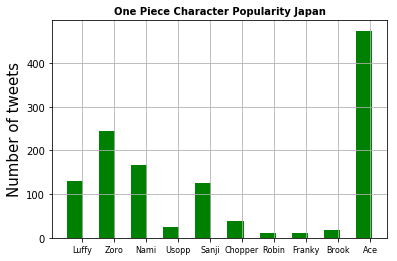

Ace: 474
Zoro: 244
Nami: 167
Luffy: 131
Sanji: 125
Chopper: 39
Usopp: 25
Brook: 17
Robin: 12
Franky: 12


In [181]:
#Plot the number of Japanese tweets for each character
characters = ['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji', 'Chopper', 'Robin', 'Franky', 'Brook', 'Ace']
tweets_by_chara_JP = [tweets['luffyJP'].value_counts()[True],
                      tweets['zoroJP'].value_counts()[True],
                      tweets['namiJP'].value_counts()[True],
                      tweets['usoppJP'].value_counts()[True],
                      tweets['sanjiJP'].value_counts()[True],
                      tweets['chopperJP'].value_counts()[True],
                      tweets['robinJP'].value_counts()[True],
                      tweets['frankyJP'].value_counts()[True],
                      tweets['brookJP'].value_counts()[True],
                      tweets['aceJP'].value_counts()[True]]

x_pos = list(range(len(characters)))
width = 0.5
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_chara_JP, width, alpha=1, color='g')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('One Piece Character Popularity Japan',
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(characters, fontsize=8)
plt.grid()

plt.show()

#List the tweeted characters in descending order
character_popularity_JP = dict(zip(characters, tweets_by_chara_JP))
for key, value in sorted(character_popularity_JP.iteritems(), reverse=True, key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)


Number of Japanese tweets for Ace is unsually high. I will take a look at some of the tweets to see what they are saying.


In [182]:
for index, row in tweets.iterrows():
    if row['aceJP']:
        print row['text']

私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/B4VR5pTr8x #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/hCYoBA7zza #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/UN1b1pkyYZ #ワンピースキャラテスト

取り消せよ...！ハァ... いまの言葉...！！
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/WnVuWWRnt3 #ワンピースキャラテスト
【交換】ONE PIECE USJ トレーディング缶バッジ
譲→ルフィ、ナミ、ルフィ＆エース
求→サンジ(無限回収)
初回ツイフィ必読。お気軽にリプお願いします。 https://t.co/moLk8l2w2A
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/e4yNFRw3rq #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/UUzXNE1F5o #ワンピースキャラテスト
敗北者？取り消せよ
今の言葉
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/YoIRHqmWz7 #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/ndI4V321Ye #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/8A7QPNoJCT #ワンピースキャラテスト
ACE(   ¯꒳¯ )ｂ✧
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/ARYksDM9cZ #ワンピースキャラテスト
ONE PIECE 　 ポートガス・D・エース(KANAME)
#コスプレ

私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/WmkPL0SPw3 #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/Mdd5mGAYit #ワンピースキャラテスト

出オチ。
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/RJXfwqBvmH #ワンピースキャラテスト ハァ、敗北者？
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/gSRwo8YVnk #ワンピースキャラテスト
こんな兄貴欲しかった！
どんな未来も受け入れる

差し延べられた手は掴む…!!

おれを裁く白刃も受け入れる……

もうジタバタしねェ

ONE　PIECE（by エース）
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/e44lBEn5mR #ワンピースキャラテスト
意外すぎたΣ(-∀-；)
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/xCbcdNqk7W #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/18xhrRQ3ia #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/VhB2VnIifW #ワンピースキャラテスト

ハァ...ハァ......敗北者？
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/pskHZaJhXh #ワンピースキャラテスト

火拳のノエル🔥
【交換】ONE PIECE ワンピース 輩缶バッジ 輩 第16弾 UTAGE 宴 海賊袋

譲) カタクリ、ロー、ドフラミンゴ、白ひげ、エース、マルコ、ペドロ、シャンクス、バギー（画像参照）
求) ゾロ、サンジ
※まとめての方優先… https://t.co/DP9TUwU4

私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/3yh8ZIFB1e #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/hebBg3GQBp #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/WMBbZiHP6m #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/xdFFF0NZkj #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/1WRYch8LHQ #ワンピースキャラテスト
エースでしたかw
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/taFRxjJT0V #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/oveNoxmXnH #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/Npkzm8xks5 #ワンピースキャラテスト

ハァ…ハァ…敗北者…？
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/oWYlTORUh6 #ワンピースキャラテスト嬉しいー！
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/Xvfn2Qfcpg #ワンピースキャラテスト
ハァ...ハァ...？
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/xVgApMwX6i #ワンピースキャラテスト
ハア……ハア……敗北者？
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/R7PwPea8J7 #

嘘ぶっこいてんじゃねぇよw
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/QfgXGiqYZQ #ワンピースキャラテスト
エース描いてみた。
#落書き＃ONE PIECE#自己満 https://t.co/MJ1941obyD
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/gb2i2ONKL5 #ワンピースキャラテスト
やめやめろ！
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/SnH7l7lGfO #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/oEy0juH9Gw #ワンピースキャラテスト
取り消せよ.......!!!今の言葉.......!!!
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/AyNdzn174O #ワンピースキャラテスト

 エースって死ぬよな？

 イヤァアアアア！ 死にたくない！ε=ε=ε=ε=ε=ε=┌(;￣◇￣)┘
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/TpvC4ZueuF #ワンピースキャラテスト
ハァ...ハァ...
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/zv2BtaAefo #ワンピースキャラテスト

ハァ…ハァ… 敗北者……？
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/xS6v7zBNvH #ワンピースキャラテスト
ﾊｧ…敗北者
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/spPkZNEav2 #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/CIMsqmBhw3 #ワンピースキャラテスト
私をワンピースのキャラ

私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/2Z1LyaIOWG #ワンピースキャラテスト

ハァ…ハァ…敗北者？
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/s6GcLvVHvc #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/ZDtZjugVBQ #ワンピースキャラテスト
死しても人気のある存在ですか、僕も周りに良い影響の出る存在になりたいですなぁ…（理想）
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/F97jtMrp25 #ワンピースキャラテスト
やってみた……w
人気キャラやん！( ´;ﾟ;∀;ﾟ;)
RT @onepi_fig: ONE PIECEプレゼント企画です！
火拳のエース P.O.P DX
1名様にプレゼント！
応募期間:1/25まで
応募方法👉フォロー＆リツイートのみ🗣当選者はDMにてご連絡致します！
たくさんのご参加お待ちしております(^^) https://…
RT @onepi_fig: ONE PIECEプレゼント企画です！
火拳のエース P.O.P DX
1名様にプレゼント！
応募期間:1/25まで
応募方法👉フォロー＆リツイートのみ🗣当選者はDMにてご連絡致します！
たくさんのご参加お待ちしております(^^) https://…
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/yhnsOsQzY0 #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/vKwSOk5ipl #ワンピースキャラテスト
引けんのエース(´-ω-`)
😄😆👍

私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.co/VmFa6NJ9vF #ワンピースキャラテスト
私をワンピースのキャラでいうと：ポートガス・D・エースでした！！あなたも見て見て！！ https://t.

It looks like quite a few of the tweets is from the "One Piece Character Test", a survey to see which One Piece character you are. I don't know if the survey is biased, but a lot of people including me got Ace as their character. The result of a character test should not be included in determining popularity, so I need to filter this type of tweets out. 

In [183]:
#add a new column that yields True if the tweet does not mention the One Piece Character Test
tweets['not_survey'] = tweets['text'].apply(lambda tweet: not word_in_text(u'ワンピースキャラテスト', tweet))

In [184]:
#add new columns that yield True if the character is mentioned in Japanese AND it is not a survey
tweets['luffyJP_adj'] = tweets['luffyJP'] & tweets['not_survey']
tweets['zoroJP_adj'] = tweets['zoroJP'] & tweets['not_survey']
tweets['namiJP_adj'] = tweets['namiJP'] & tweets['not_survey']
tweets['usoppJP_adj'] = tweets['usoppJP'] & tweets['not_survey']
tweets['sanjiJP_adj'] = tweets['sanjiJP'] & tweets['not_survey']
tweets['chopperJP_adj'] = tweets['chopperJP'] & tweets['not_survey']
tweets['robinJP_adj'] = tweets['robinJP'] & tweets['not_survey']
tweets['frankyJP_adj'] = tweets['frankyJP'] & tweets['not_survey']
tweets['brookJP_adj'] = tweets['brookJP'] & tweets['not_survey']
tweets['aceJP_adj'] = tweets['aceJP'] & tweets['not_survey']


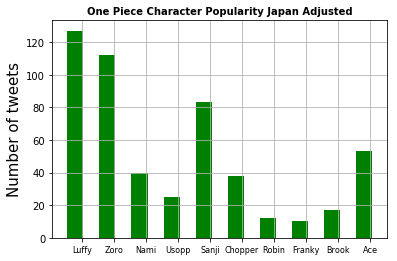

Luffy: 127
Zoro: 112
Sanji: 83
Ace: 53
Nami: 40
Chopper: 38
Usopp: 25
Brook: 17
Robin: 12
Franky: 10


In [185]:
#Plot the number of Japanese tweets for each character again, using the new columns
characters = ['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji', 'Chopper', 'Robin', 'Franky', 'Brook', 'Ace']
tweets_by_chara_JP_adj = [tweets['luffyJP_adj'].value_counts()[True],
                          tweets['zoroJP_adj'].value_counts()[True],
                          tweets['namiJP_adj'].value_counts()[True],
                          tweets['usoppJP_adj'].value_counts()[True],
                          tweets['sanjiJP_adj'].value_counts()[True],
                          tweets['chopperJP_adj'].value_counts()[True],
                          tweets['robinJP_adj'].value_counts()[True],
                          tweets['frankyJP_adj'].value_counts()[True],
                          tweets['brookJP_adj'].value_counts()[True],
                          tweets['aceJP_adj'].value_counts()[True]]

x_pos = list(range(len(characters)))
width = 0.5
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_chara_JP_adj, width, alpha=1, color='g')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('One Piece Character Popularity Japan Adjusted',
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(characters, fontsize=8)
plt.grid()

plt.show()

#List the tweeted characters in descending order
character_popularity_JP_adj = dict(zip(characters, tweets_by_chara_JP_adj))
for key, value in sorted(character_popularity_JP_adj.iteritems(), reverse=True, key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

Number of tweets for Ace has decreased considerably.

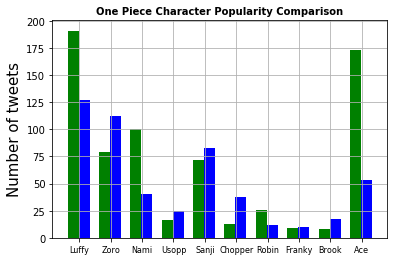

In [193]:
#Compare the popularities of each character between English-speaking countries and Japan
fig, ax = plt.subplots()

index = np.arange(len(characters))
bar_width = 0.35

bar1 = ax.bar(x_pos, tweets_by_chara, bar_width, alpha=1, color='g', label='English')
bar2 = ax.bar(index+bar_width, tweets_by_chara_JP_adj, bar_width, alpha=1, color='b', label='Japanese')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('One Piece Character Popularity Comparison',
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(characters, fontsize=8)
plt.grid()

plt.show()



Luffy seems to be much more popular in English-speaking countries than the other Strawhat crews when compared to Japan. Ace also seems to be more popular in English-speaking countries.

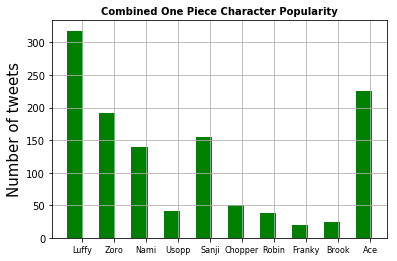

Luffy: 318
Ace: 226
Zoro: 191
Sanji: 155
Nami: 140
Chopper: 51
Usopp: 41
Robin: 38
Brook: 25
Franky: 19


In [194]:
characters = ['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji', 'Chopper', 'Robin', 'Franky', 'Brook', 'Ace']
tweets_by_chara_total = [tweets['luffy'].value_counts()[True] + tweets['luffyJP_adj'].value_counts()[True],
                   tweets['zoro'].value_counts()[True] + tweets['zoroJP_adj'].value_counts()[True],
                   tweets['nami'].value_counts()[True] + tweets['namiJP_adj'].value_counts()[True],
                   tweets['usopp'].value_counts()[True] + tweets['usoppJP_adj'].value_counts()[True],
                   tweets['sanji'].value_counts()[True] + tweets['sanjiJP_adj'].value_counts()[True],
                   tweets['chopper'].value_counts()[True] + tweets['chopperJP_adj'].value_counts()[True],
                   tweets['robin'].value_counts()[True] + tweets['robinJP_adj'].value_counts()[True],
                   tweets['franky'].value_counts()[True] + tweets['frankyJP_adj'].value_counts()[True],
                   tweets['brook'].value_counts()[True] + tweets['brookJP_adj'].value_counts()[True],
                   tweets['ace'].value_counts()[True] + tweets['aceJP_adj'].value_counts()[True]]

x_pos = list(range(len(characters)))
width = 0.5
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_chara_total, width, alpha=1, color='g')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Combined One Piece Character Popularity',
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(characters, fontsize=8)
plt.grid()

plt.show()

#List the tweeted characters in descending order
character_popularity_total = dict(zip(characters, tweets_by_chara_total))
for key, value in sorted(character_popularity_total.iteritems(), reverse=True, key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

# Conclusion
Luffy is the most mentioned character on Twitter, which, not surprisingly, suggests that Luffy is the most popular character in One Piece. Interestingly, even after filtering out the survey, Ace is still the second most mentioned character on Twitter. This is very impressive seeing as how he died nearly 10 years ago. Zoro comes in a close third, Sanji fourth, and Nami fifth.

Now there are some non-relevant tweets included. It is difficult to filter out non-relevant tweets without accidentally filtering out some of the relevant ones. However, that should not change the results all that much.
